# STA 561 HW 5 {-}

Authors  
 -  Alonso Guerrero Castaneda (UID: 1194613)  
 -  Eli Gnesin (UID: 1172961)  
 -  Tommy Misikoff (UID: 1166813)  
 -  Sanskriti Purohit (UID: 1179957)  
 -  Will Tirone (UID: 1130904)  

TA: Rick Presman 

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import random
import numpy.random as nr
from sklearn import datasets
import matplotlib.pyplot as plt

### Question 1 {-}

$$
\begin{aligned}
\mathbb{E}||k^\frac{-1}{2} \Omega \bf{x}||^2 &= k^{-1} \mathbb{E} \bigg| \bigg| \begin{bmatrix}
           \Omega_{1}^T \bf{x} \\
           \vdots \\
           \Omega_{k}^T \bf{x}
         \end{bmatrix}
\bigg| \bigg|^2 \\
&= k^{-1} \mathbb{E} \bigg[ \bigg(\Omega_{1,1} x_1 + \dots + \Omega_{1,p}x_p\bigg)^2 + \dots + \bigg(\Omega_{k,1} x_1 + \dots + \Omega_{k,p}x_p\bigg)^2 \bigg] \\
&= k^{-1} \mathbb{E} \bigg[ [ x_1^2 \Omega_{1,1}^2 + \Omega_{1,1}\Omega_{1,2}x_1x_2 + \dots] + \dots + [x_1^2 \Omega_{k,1}^2 + \dots] \bigg] \\
\end{aligned}
$$

Now the non-squared terms will be 0, since $\mathbb{E}(\Omega_{i,j}) = 0$ and they are i.i.d. For example, $\mathbb{E}(\Omega_{1,1}\Omega_{1,2}x_1x_2) = x_1x_2\mathbb{E} (\Omega_{1,1})\mathbb{E}(\Omega_{1,2}) = 0$

$$
\begin{aligned}
&= k^{-1}  \bigg[ [x_1^2 \mathbb{E}(\Omega_{1,1}^2)  + \dots + x_p^2\mathbb{E}(\Omega_{1,p}^2)] + \dots + [x_1^2 \mathbb{E}(\Omega_{k,1}^2) + \dots + x_p^2\mathbb{E}(\Omega_{k,p}^2)] \bigg] \\ 
&= k^{-1} \bigg[ [x_1^2  + \dots + x_p^2] + \dots + [x_1^2 + \dots + x_p^2 ] \bigg] \ \ \ \ \ \ \ \ \ \ \text{second moment: } \text{Var}(\Omega_{i,j}) = E(\Omega_{i,j}^2) - 0 = 1 \\ 
&= k^{-1} \bigg[ || x ||^2 + \dots + || x ||^2 \bigg] \\ 
&= ||x||^2 \\
\end{aligned}
$$

If we want to generate $\Omega_{i,j} \overset{IID}{\sim} Q$, the necessary conditions for the above proof to hold are that $Q$ has a mean of 0 and a variance of 1.

### Question 2 {-}

$$
\begin{aligned}
\hat{\beta}_n^\Omega &= \Omega^T \text{argmin}_\beta \mathbb{P}_n (Y - (\Omega\bf{X})^T\beta)^2\\
&= \Omega^T((\mathbb{P}_n(\Omega \bf{X})(\Omega \bf{X})^T)^{-1} \mathbb{P}_n(\Omega \bf{X})Y \\ 
&= \Omega^T( \Omega \mathbb{P}_n \bf{X} \textbf{X}^T \Omega^T)^{-1}  \Omega \mathbb{P}_n  {\textbf X} Y
\end{aligned}
$$

Now set $\Sigma = \mathbb{P}_n \bf{X} \bf{X}^T$ and $\Gamma = \mathbb{P}_n  \bf{X} Y$. If our data is very large, say 10 million rows, we can make a single pass through the data to compute these quantities, with the below pseudo code:

```
// initialize
X = data
Y = target
B = number of replicates, chosen by the user
n = length(target)
Sigma = 0
Gamma = 0
Beta = 0

// Loop through and sum
// The goal here is to calculate P_n XX^T and P_n XY exactly once and store them
For i in 1 : n

    // Calculate XX^T and XY
    temp_data = X[i]
    temp_target = Y[i]
    temp_Sigma = temp_data * temp_data^T
    temp_Gamma = temp_data * temp_target
    
    Sigma = Sigma + temp_Sigma
    Gamma = Gamma + temp_Gamma
    
Sigma = (1/n) * Sigma
Gamma = (1/n) * Gamma

// Now loop through our B and calculate beta_hat
For b in 1 : B
    Omega = (k * p matrix randomly sampled from Q)
    Inter = Omega @ Sigma @ Omega^T
    Inv_inter = Inter^{-1}
    projected_beta = Omega^T @ Inv_inter @ Omega @ Gamma
    
    Beta = Beta + projected_beta

Beta = (1/B) * Beta

// RETURN Beta
```

Regardless of the size of our dataset, we calculate $\Sigma$ and $\Gamma$ by iterating through the data once, taking $\bf{X}\bf{X}^T \in \mathbb{R}^{p \times p}$ and $\bf{X}\bf{Y} \in \mathbb{R}^{p \times 1}$ for each $\bf{X}_i, Y_i$ in the dataset, and then adding it to the current $\Sigma$ and $\Gamma$ respectively. Because of this, at any given time, we only store $\Sigma, \Gamma, \bf{X_i}\bf{X_i}^T, \bf{X_i}Y_i$, all of which require either $O(p^2)$ or $O(p)$ storage. 

Once we have $\Sigma$ and $\Gamma$, regardless of the size of $B$, we can calculate $\hat{\beta}_n^{\Omega^{(b)}} \in R^{p \times 1}$, and then take a rolling sum of $\hat{\beta}_n^{\Omega^{(b)}}$, before taking the average and returning $\hat{\beta}^{ave}_n$. Storing each $\hat{\beta}_n^{\Omega^{(b)}}$ has storage $O(p)$, so the algorithm in total requires storage of $O(p^2)$, as desired. We do need to use storage $O(k^2)$ in order to store $\Omega\mathbb{P}_n\mathbf{X}\mathbf{X}^T\Omega^T$ in order to take its inverse, but since $k < p$, the storage of the algorithm is still of order $p^2$.

<!-- https://users.csc.calpoly.edu/~jdalbey/SWE/pdl_std.html -->

### Question 3 {-}

For our implementation of this function, we consider $P$ to be a uniform distribution across the integers $\{k_{min}, k_{min}+1, ..., k_{max}\}$ by default, but allow the user to pass in some other callable sampling function that will sample over the same range. Likewise, $Q$ defaults to a $N(0,1)$ distribution or a rademacher distribution, but Q can be any callable function that takes in two arguments $(k^{(b)}, p)$ and gives a $k^{(b)} \times p$ matrix of randomly sampled values. For this implementation, this is most easily done with a `lambda` function on a NumPy function for a rademacher distribution, with the `lambda` function arguments for the size.

In [72]:
def Randy(X, y, B = 1000, Q = lambda x,y: np.array((nr.rand(1,x*y)<.5)*2 - 1).reshape(x,y), k_min = 1, k_max = 100, P = None):
    
    n = len(y)
    p = X.shape[1]
    
    Sigma = np.zeros(shape = (p, p))
    Gamma = np.zeros(shape = (p, 1))
    Beta = np.zeros(shape = (p, 1))

    #First, we need to calculate Sigma and Gamma
    for i in range(0, n):
        data_temp = np.asarray(X.iloc[i,]).reshape(-1,1)
        targ_temp = y[i]
        Sigma_temp = data_temp @ data_temp.T
        Gamma_temp = data_temp * targ_temp
        
        Sigma = Sigma + Sigma_temp
        Gamma = Gamma + Gamma_temp
    
    Sigma = (1/n) * Sigma
    Gamma = (1/n) * Gamma
    
    #Now we need to calculate our B estimates for Beta
    for i in range(0, B):
    
        #Sample k_b from P(k)
        if P is not None:
            k_b = P(k_min, k_max)
        else:
            k_b = random.randint(k_min, k_max)
            
        Omega = Q(k_b, p)
        Inter = Omega @ Sigma @ Omega.T
        proj_beta = Omega.T @ np.linalg.inv(Inter) @ Omega @ Gamma
        
        Beta = Beta + proj_beta
        
    Beta_ave = (1/B) * Beta
    
    return Beta_ave

In [86]:
nr.seed(1)
X, y, t_coef = datasets.make_regression(n_samples=10000,n_features=1000,n_informative=100,coef=True)
X = pd.DataFrame(X)
Beta_ave = Randy(X,y,k_min=50,k_max=100)

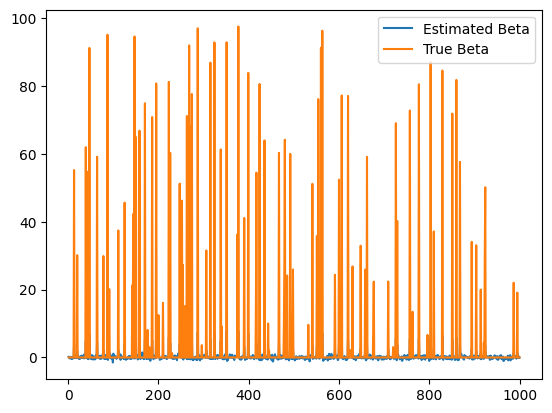

In [100]:
plt.plot(range(1,X.shape[1]+1),Beta_ave, label = "Estimated Beta")
plt.plot(range(1,X.shape[1]+1), t_coef, label = "True Beta")
plt.legend()
plt.show()

### Question 4 {-}

This problem is basically a projection error minimization problem. While this could be solved numerically, we can obtain a closed form solution for the optimal $\Omega$ by realizing this is just an alternative formulation of PCA. 

See lectures notes from Radu Horaud (http://perception.inrialpes.fr/~Horaud/Courses/pdf/Horaud-DAML5.pdf) or alternatively the original chapter 12 of Bishop (2006) (http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf) for the complete derivation. Bishop (2006) showed that the solution to this minimization problem is choosing the K largest eigenvectors of the covariance X. 

So our function defines function `fn` that computes the objective function, `k_dim_embedding`, which computes the eigenvectors, and then runs the simulations based on synthetic data. This true synthetic data is generated using a linear model with Guassian noise. Then we plot a comparison between the values obtained in the objective function fn from both methods and then we do the same for the out-of-sample MSE. 

As we can see in the first plot, by construction, the objective function takes values very close to zero for the optimal solution, while is fairly random given a random projection. Now, the interesting part is that the second plot reveal very similar out-of-sample MSEs. That is, it doesn't appear to make much of a difference using a random projection compared to the "optimal" one. 

In [63]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Objective function fn
def fn(Omega, X):
    n, p = X.shape
    X_Omega = X @ Omega.T
    inner_products = X @ X.T
    Omega_inner_products = X_Omega @ X_Omega.T
    return np.sum((inner_products - Omega_inner_products)**2)

# K-dim embedding function
def k_dim_embedding(X, k):
    n, p = X.shape
    # Covariance matrix
    cov_X = np.cov(X.T)
    # Top k eigenvectors of covariance
    eigenvalues, eigenvectors = np.linalg.eigh(cov_X)
    # Take k eigenvectors corresponding to the k largest eigenvalues
    Omega_kdim = eigenvectors[:, -k:]
    # Return Omega as a (k, p) matrix
    return Omega_kdim.T

# Parameters
n = 1000 # sample size
p = 50 # number of dimensions/regressors
k = 10 # number of reduced dimensions
n_simulations = 100  # number of simulations
beta_true = np.random.normal(size=p) # true beta coefficients

# Results dataframe
results_df = pd.DataFrame(columns=['Simulation', 'Method', 'fn', 'MSE'])

for i in range(n_simulations):
    # Generate  data
    X = np.random.normal(size=(n, p))
    e = np.random.normal(size=n)
    y = X @ beta_true + e
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Calculate fn and MSE for random projection method
    # We choose random normal 
    Omega_random = np.random.normal(size=(k, p))
    fn_random = fn(Omega_random, X_train)
    model_random = LinearRegression()
    X_train_random = X_train @ Omega_random.T
    model_random.fit(X_train_random, y_train)
    y_pred_random = model_random.predict(X_test @ Omega_random.T)
    mse_random = np.mean((y_test - y_pred_random)**2)
    results_df = pd.concat([results_df, pd.DataFrame({'Simulation': [i+1], 'Method': ['Random Projection'], 'fn': [fn_random], 'MSE': [mse_random]})])
    
    # Calculate fn and MSE for k-dim embedding method
    Omega_kdim = k_dim_embedding(X_train, k)
    fn_kdim = fn(Omega_kdim, X_train)
    model_kdim = LinearRegression()
    X_train_kdim = X_train @ Omega_kdim.T
    model_kdim.fit(X_train_kdim, y_train)
    y_pred_kdim = model_kdim.predict(X_test @ Omega_kdim.T)
    mse_kdim = np.mean((y_test - y_pred_kdim)**2)
    results_df = pd.concat([results_df, pd.DataFrame({'Simulation': [i+1], 'Method': ['K-dim Embedding'], 'fn': [fn_kdim], 'MSE': [mse_kdim]})])
    
results_df.reset_index(drop=True, inplace=True)
print(results_df)


    Simulation             Method            fn        MSE
0            1  Random Projection  2.410688e+10  44.291845
1            1    K-dim Embedding  2.147244e+07  49.813253
2            2  Random Projection  2.166990e+10  47.610149
3            2    K-dim Embedding  2.156385e+07  44.566010
4            3  Random Projection  1.823309e+10  40.037707
..         ...                ...           ...        ...
195         98    K-dim Embedding  2.178134e+07  45.387477
196         99  Random Projection  1.728632e+10  42.036464
197         99    K-dim Embedding  2.159327e+07  49.290599
198        100  Random Projection  1.481993e+10  36.985113
199        100    K-dim Embedding  2.203076e+07  43.815145

[200 rows x 4 columns]


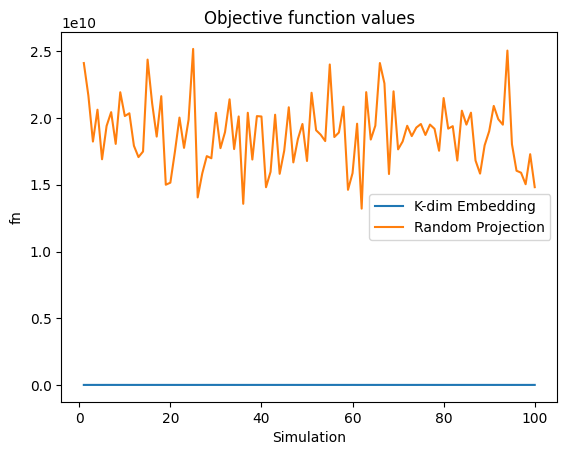

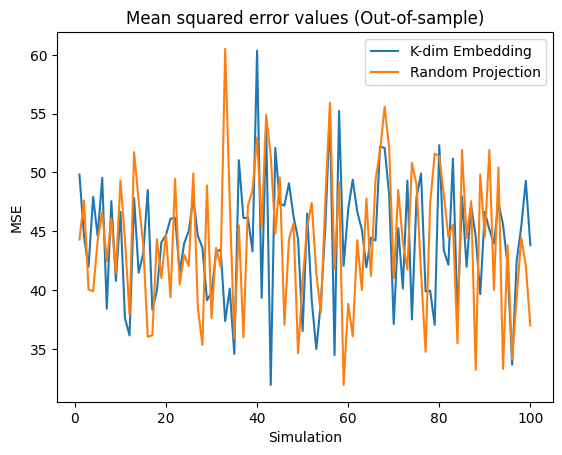

In [64]:
import matplotlib.pyplot as plt

# Plot 1: fn values for each simulation
fig, ax = plt.subplots()
for key, grp in results_df.groupby('Method'):
    ax = grp.plot(ax=ax, kind='line', x='Simulation', y='fn', label=key)
ax.set_xlabel('Simulation')
ax.set_ylabel('fn')
ax.set_title('Objective function values')
plt.show()

# Plot 2: MSE values for each simulation
fig, ax = plt.subplots()
for key, grp in results_df.groupby('Method'):
    ax = grp.plot(ax=ax, kind='line', x='Simulation', y='MSE', label=key)
ax.set_xlabel('Simulation')
ax.set_ylabel('MSE')
ax.set_title('Mean squared error values (Out-of-sample)')
plt.show()
